# 1 À propos du calcul de $π$

## 1.1 En demandant à la lib maths

Mon ordinateur m’indique que $π$ vaut approximativement

In [6]:
from math import *
print(pi)

3.141592653589793


## 1.2 En utilisant la méthode des aiguilles de Buffon

Mais calculé avec la **méthode** des [aiguilles de Buffon](https://fr.wikipedia.org/wiki/Aiguille_de_Buffon), on obtiendrait comme **approximation** :

In [11]:
import numpy as np
np.random.seed(seed=42)
N = 10000
x = np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)

3.128911138923655

In [13]:
%load_ext rpy2.ipython

In [14]:
%%R
library(stats)
set.seed(42)
N <- 10000
x <- runif(N, min = 0, max = 1)
theta <- runif(N, min = 0, max = pi/2)
2 / (sum((x + sin(theta)) > 1) / N)

[1] 3.17662


## 1.3 Avec un argument "fréquentiel" de surface

Sinon, une méthode plus simple à comprendre et ne faisant pas intervenir d’appel à la fonction
sinus se base sur le fait que si $X ∼ U(0, 1)$ et $Y ∼ U(0, 1)$ alors $P[X2 + Y2 ≤ 1] = π/4$ (voir
[méthode de Monte Carlo sur Wikipedia](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Monte-Carlo#D%C3%A9termination_de_la_valeur_de_%CF%80)). Le code suivant illustre ce fait :

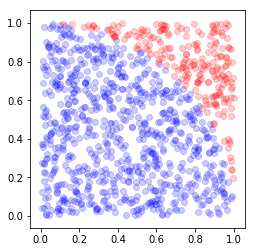

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)
accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)
fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')

Il est alors aisé d’obtenir une approximation (pas terrible) de $π$ en comptant combien de fois,
en moyenne, $X^2 + Y^2$ est inférieur à $1$ :

In [10]:
4*np.mean(accept)

3.112